In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.metrics import confusion_matrix
import torch
import scanpy as sc
from dataset import *
from models import *
from trainAndTest import *


In [2]:
accs = [[(0.3188405797101449, 0.8840579710144928), (0.2753623188405797, 0.8840579710144928), (0.3188405797101449, 0.8840579710144928), (0.2898550724637681, 0.8985507246376812), (0.2898550724637681, 0.927536231884058), (0.2898550724637681, 0.8985507246376812), (0.2898550724637681, 0.8985507246376812), (0.3188405797101449, 0.8985507246376812), (0.34782608695652173, 0.8985507246376812), (0.3188405797101449, 0.927536231884058), (0.3188405797101449, 0.927536231884058), (0.3333333333333333, 0.9420289855072463), (0.2898550724637681, 0.8695652173913043), (0.2753623188405797, 0.927536231884058), (0.30434782608695654, 0.9565217391304348)], [(0.34782608695652173, 0.8985507246376812), (0.2898550724637681, 0.8840579710144928), (0.391304347826087, 0.8840579710144928), (0.36231884057971014, 0.927536231884058), (0.2898550724637681, 0.9420289855072463), (0.3333333333333333, 0.927536231884058), (0.37681159420289856, 0.9420289855072463), (0.3333333333333333, 0.8840579710144928), (0.30434782608695654, 0.927536231884058), (0.3188405797101449, 0.9565217391304348), (0.36231884057971014, 0.9565217391304348), (0.3333333333333333, 0.927536231884058), (0.30434782608695654, 0.927536231884058), (0.3188405797101449, 0.927536231884058), (0.3333333333333333, 0.9420289855072463)], [(0.34782608695652173, 0.8840579710144928), (0.2898550724637681, 0.8985507246376812), (0.3333333333333333, 0.8985507246376812), (0.30434782608695654, 0.8985507246376812), (0.2753623188405797, 0.9420289855072463), (0.34782608695652173, 0.9420289855072463), (0.2898550724637681, 0.9565217391304348), (0.3188405797101449, 0.9130434782608695), (0.3188405797101449, 0.927536231884058), (0.34782608695652173, 0.9420289855072463), (0.30434782608695654, 0.9130434782608695), (0.2898550724637681, 0.9130434782608695), (0.2898550724637681, 0.8985507246376812), (0.42028985507246375, 0.927536231884058), (0.36231884057971014, 0.927536231884058)], [(0.3188405797101449, 0.8840579710144928), (0.3333333333333333, 0.8840579710144928), (0.3188405797101449, 0.9130434782608695), (0.3333333333333333, 0.8840579710144928), (0.36231884057971014, 0.8985507246376812), (0.2608695652173913, 0.9130434782608695), (0.3333333333333333, 0.9130434782608695), (0.30434782608695654, 0.9420289855072463), (0.391304347826087, 0.8985507246376812), (0.2898550724637681, 0.9130434782608695), (0.3333333333333333, 0.9130434782608695), (0.36231884057971014, 0.9565217391304348), (0.3333333333333333, 0.9565217391304348), (0.3188405797101449, 0.927536231884058), (0.3188405797101449, 0.9130434782608695)], [(0.30434782608695654, 0.8840579710144928), (0.30434782608695654, 0.8985507246376812), (0.3188405797101449, 0.8985507246376812), (0.2898550724637681, 0.8840579710144928), (0.2898550724637681, 0.927536231884058), (0.2608695652173913, 0.927536231884058), (0.2753623188405797, 0.927536231884058), (0.30434782608695654, 0.9420289855072463), (0.36231884057971014, 0.927536231884058), (0.2463768115942029, 0.927536231884058), (0.36231884057971014, 0.8695652173913043), (0.34782608695652173, 0.9130434782608695), (0.3333333333333333, 0.8840579710144928), (0.2608695652173913, 0.9130434782608695), (0.3333333333333333, 0.9130434782608695)], [(0.3188405797101449, 0.8695652173913043), (0.3188405797101449, 0.8840579710144928), (0.34782608695652173, 0.8985507246376812), (0.3188405797101449, 0.8840579710144928), (0.2608695652173913, 0.8985507246376812), (0.3333333333333333, 0.927536231884058), (0.3333333333333333, 0.8840579710144928), (0.37681159420289856, 0.9130434782608695), (0.3188405797101449, 0.8985507246376812), (0.30434782608695654, 0.8985507246376812), (0.4057971014492754, 0.9130434782608695), (0.37681159420289856, 0.8985507246376812), (0.34782608695652173, 0.927536231884058), (0.3333333333333333, 0.927536231884058), (0.34782608695652173, 0.927536231884058)]]

braakindex = [0,2,8,13,15,16,17,18,22,24,27,29,32,37
,38,39,41,42,45,50,62,63,64,69,72,75,77,84
,93,94,98,101,102,103,113,117,118,124,127,129,130,132
,140,142,150,151,153,169,187,189,191,192,195,203,207,209
,211,213,216,221,229,230,231,233,234,239,244,245,248,257
,268,269,271,275,276,277,280,288,290,295,298,304,305,307
,308,318,323,324,331,339,341,342,343,352,356,358,361,372
,378,386,394,398,399,407,408,409,410,415,418,428,437,444
,455,458,459,460,468,471,472,473,474,481,484,487,492,495
,498,500,502,509,518,520,521,527,528,529,530,531,532,540
,541,542,550,556,565,570,571,572,580,583,591,595,597,599
,603,606,607,608,609,614,619,627,630,631,635,636,649,651
,653,660,667,674,677,679,680,682,688,693,695,697,698,704
,708,710,716,720,729,739,741,743,745,747,751,754,755,756
,759,762,763,765,769,771,773,780,782,788,789,793,805,817
,818,819,821,826,828,830,833,838,841,846,851,853,855,861
,865,871,875,877,878,880,893,906,908,911,918,919,920,926
,928,931,933,935,937,939,942,945,949,950,962,965,967,978
,980,982,984,985,988,994,1003,1034,1036,1038,1039,1041,1046,1047
,1048,1051,1052,1053,1054,1055,1058,1071,1080,1086,1087,1088,1091,1095
,1098,1099,1108,1113,1116,1117,1118,1119,1129,1135,1142,1144,1145,1148
,1149,1150,1151,1167,1178,1179,1180,1186,1187,1188,1191,1193,1204,1208
,1214,1220,1226,1228,1230,1233,1234,1237,1240,1247,1249,1254,1256,1268
,1270,1273,1282,1285,1291,1294,1300,1301,1308,1319,1325,1326,1340,1341
,1346,1349,1353,1355,1357,1361,1362,1363,1365,1369,1370,1371,1373,1379
,1381,1382,1384,1385,1398,1400,1401,1402,1403,1405,1407,1410,1415,1417
,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1431,1435
,1436,1441,1443,1444,1446,1447,1449,1450,1452,1453,1459,1462,1463,1466
,1470,1472,1479,1481,1482,1488,1491,1494,1496,1500,1501,1503,1517,1525
,1533,1535,1539,1551,1555,1559,1562,1567,1577,1579,1581,1583,1585,1588
,1593,1594,1599,1611,1612,1613,1617,1624,1635,1636,1637,1638,1640,1642
,1647,1648,1654,1661,1664,1669,1673,1674,1675,1676,1683,1685,1686,1699
,1704,1707,1708,1715,1723,1730,1733,1735,1739,1746,1747,1758,1761,1763
,1764,1768,1769,1775,1781,1794,1802,1806,1807,1810,1816,1821,1824,1840
,1842,1845,1846,1849,1850,1851,1854,1858,1859,1862,1864,1865,1866,1868
,1870,1879,1883,1886,1889,1892,1893,1894,1896,1897,1898,1900,1902,1904
,1907,1912,1916,1918,1926,1931,1948,1949,1950,1951,1954,1958,1960,1961
,1963,1965,1966,1969,1971,1975,1978,1981,1982,1990,1991,1992,1995,1996
,1997,1999,2000,2001,2002,2003,2007,2009,2010,2012,2013,2017,2020,2021
,2022,2024,2042,2045,2057,2066,2078,2090,2103,2105,2110,2113,2117,2118
,2119,2124,2133,2136,2138,2144,2145,2146,2147,2153,2154,2158,2162,2165
,2167,2171,2174,2175,2176,2183,2191,2194,2196,2197,2204,2209,2210,2212
,2216,2220,2222,2226,2230,2232,2237,2240,2243,2244,2248,2249,2251,2262
,2263,2265,2277,2280,2295,2299,2302,2309,2315,2325,2328,2334,2345,2347
,2348,2350,2365,2373,2374,2378,2380,2381,2391,2395,2410,2411,2415,2417
,2418,2422,2426,2433,2434,2435,2436,2439,2441,2443,2446,2447,2453,2458
,2459,2460,2466,2469,2472,2474,2475,2476,2484,2485,2499,2504,2506,2514
,2517,2519,2520,2523,2524,2527,2530,2531,2538,2558,2564,2565,2567,2568
,2572,2575,2576,2583,2587,2589,2592,2604,2607,2610,2612,2614,2617,2620
,2621,2622,2628,2634,2660,2662,2663,2666,2669,2674,2676,2680,2687,2692
,2693,2694,2701,2704,2705,2712,2718,2723,2725,2726,2734,2735,2738,2751
,2761,2769,2770,2775,2780,2787,2791,2797,2803,2807,2810,2812,2813,2814
,2815,2829,2830,2832,2834,2838,2839,2844,2852,2855,2859,2883,2887,2889
,2891,2892,2895,2902,2911,2913,2914,2916,2923,2925,2926,2929,2934,2936
,2938,2939,2946,2950,2956,2960,2961,2965,2968,2979,2980,2985,2991,2999
,3010,3012,3014,3025,3027,3028,3029,3030,3036,3040,3044,3045,3048,3054
,3065,3077,3083,3091,3096,3109,3119,3126,3128,3132,3137,3140,3141,3151
,3153,3155,3156,3158,3170,3173,3200,3204,3211,3214,3217,3221,3227,3229
,3235,3239,3258,3262,3264,3265,3268,3278,3279,3280,3281,3290,3292,3297
,3299,3305,3314,3317,3321,3323,3326,3327,3329,3330,3333,3345,3347,3349
,3351,3353,3359,3364,3366,3371,3375,3378,3384,3391,3393,3395,3397,3398
,3402,3408,3410,3411,3412,3417,3419,3420,3423,3424,3430,3439,3446,3449
,3452,3474,3475,3481,3490,3497,3502,3505,3509,3518,3519,3521,3524,3525
,3527,3536,3538,3539,3540,3541,3542,3550,3560,3563,3564,3574,3577,3582
,3585,3587,3590,3592,3603,3612,3613,3616,3619,3622,3625,3627,3629,3630
,3631,3639,3645,3652,3660,3662,3664,3665,3667,3671,3680,3681,3691,3692
,3693,3703,3704,3711,3712,3715,3728,3731,3732,3733,3738,3739,3742,3743
,3756,3757,3766,3770,3780,3781,3786,3792,3795,3800,3802,3803,3804,3805
,3806,3812,3818,3820,3832,3837,3839,3849,3850,3859,3870,3880,3884,3885
,3894,3899,3904,3914,3916,3932,3938,3940,3945,3950,3951,3952,3954,3955
,3956,3957,3959,3961,3962,3963,3964,3965,3966,3967,3968,3969,3970,3971
,3972,3973,3974,3975,3976,3977]
ceradindex = [2,3,5,8,13,17,22,24,29,41,42,47,48,50
,53,62,69,75,77,94,98,100,103,113,129,130,141,142
,143,146,150,151,153,159,161,169,174,187,189,192,193,194
,195,196,211,221,229,230,231,247,253,257,268,269,271,275
,280,288,292,295,304,305,307,308,309,328,330,332,339,343
,352,358,361,369,372,373,378,383,386,389,390,394,408,409
,410,415,418,424,427,428,433,435,437,439,444,445,455,458
,459,460,468,471,473,474,481,484,485,487,488,491,492,496
,498,502,509,518,521,527,529,530,532,540,542,543,551,556
,558,563,565,569,570,571,572,580,583,589,597,599,606,609
,627,630,635,636,645,646,651,660,667,669,670,674,679,680
,681,682,685,692,693,695,697,700,708,710,716,720,726,727
,729,743,745,746,747,754,755,756,759,762,763,765,769,771
,773,779,780,782,785,786,788,790,805,814,817,818,821,828
,829,830,833,838,840,851,853,856,861,865,871,875,877,878
,880,893,904,906,908,912,913,918,920,924,926,929,931,933
,935,937,939,942,945,949,950,957,965,967,970,977,978,980
,982,985,990,1001,1003,1026,1034,1039,1041,1044,1046,1047,1048,1051
,1052,1053,1055,1058,1059,1088,1091,1093,1095,1096,1098,1100,1105,1109
,1113,1114,1116,1117,1118,1119,1127,1128,1129,1134,1135,1136,1142,1144
,1146,1150,1153,1167,1172,1178,1179,1180,1187,1188,1191,1199,1201,1204
,1227,1229,1232,1233,1237,1244,1247,1249,1254,1256,1257,1261,1262,1264
,1268,1269,1273,1280,1285,1288,1291,1293,1296,1300,1308,1311,1325,1326
,1349,1354,1355,1356,1357,1361,1362,1363,1365,1370,1371,1373,1381,1382
,1384,1385,1386,1391,1398,1401,1402,1407,1418,1419,1421,1422,1423,1424
,1425,1427,1428,1429,1430,1440,1441,1443,1446,1447,1455,1456,1459,1460
,1462,1463,1464,1466,1470,1472,1473,1479,1481,1482,1483,1484,1485,1489
,1494,1496,1501,1503,1506,1511,1517,1522,1525,1526,1533,1535,1540,1551
,1555,1557,1564,1567,1570,1571,1572,1576,1580,1581,1582,1583,1585,1588
,1593,1594,1599,1601,1604,1607,1611,1612,1613,1617,1622,1624,1635,1636
,1637,1638,1640,1641,1644,1649,1654,1664,1669,1673,1674,1675,1676,1677
,1683,1685,1686,1704,1708,1730,1733,1734,1735,1747,1751,1761,1762,1763
,1769,1775,1776,1778,1781,1796,1799,1807,1810,1812,1813,1816,1817,1820
,1821,1824,1826,1833,1836,1840,1842,1844,1845,1846,1848,1849,1850,1858
,1859,1862,1864,1866,1868,1879,1882,1885,1889,1892,1894,1896,1897,1900
,1901,1902,1905,1912,1916,1924,1931,1940,1948,1949,1950,1951,1954,1958
,1960,1961,1963,1965,1967,1969,1975,1981,1982,1991,1992,1994,1996,1997
,1999,2001,2002,2005,2017,2020,2021,2023,2024,2030,2042,2053,2054,2058
,2066,2069,2073,2078,2080,2086,2088,2090,2103,2104,2105,2110,2114,2117
,2118,2119,2124,2136,2142,2144,2147,2154,2162,2164,2165,2166,2167,2174
,2176,2183,2191,2197,2204,2209,2210,2216,2220,2222,2226,2230,2233,2237
,2244,2248,2251,2254,2259,2262,2263,2271,2278,2280,2282,2283,2298,2299
,2300,2301,2302,2315,2328,2331,2334,2335,2345,2347,2348,2350,2365,2366
,2369,2370,2374,2378,2381,2385,2391,2395,2400,2410,2415,2418,2426,2431
,2432,2433,2434,2435,2436,2440,2443,2444,2446,2447,2451,2458,2460,2469
,2474,2475,2479,2485,2486,2493,2496,2503,2504,2505,2506,2508,2509,2514
,2517,2519,2523,2530,2558,2565,2567,2568,2572,2574,2576,2578,2580,2581
,2583,2587,2588,2589,2592,2593,2604,2607,2614,2615,2617,2620,2621,2622
,2633,2634,2640,2648,2659,2667,2669,2674,2680,2687,2693,2701,2704,2718
,2722,2723,2725,2726,2734,2740,2751,2769,2775,2780,2788,2790,2791,2799
,2801,2803,2807,2810,2812,2813,2824,2834,2839,2840,2841,2844,2852,2855
,2856,2873,2879,2894,2895,2900,2902,2909,2911,2913,2914,2915,2921,2923
,2926,2928,2929,2936,2937,2938,2939,2946,2950,2951,2952,2956,2959,2960
,2970,2980,2985,2989,2991,2996,2999,3002,3003,3007,3011,3014,3026,3027
,3040,3042,3045,3054,3057,3064,3084,3091,3096,3106,3108,3109,3111,3112
,3119,3126,3127,3128,3131,3132,3137,3138,3151,3153,3155,3156,3157,3161
,3168,3169,3171,3173,3177,3181,3189,3193,3194,3200,3211,3212,3217,3222
,3227,3229,3235,3237,3239,3258,3261,3262,3264,3267,3268,3276,3278,3280
,3285,3290,3291,3292,3297,3305,3314,3317,3323,3327,3329,3330,3333,3340
,3347,3349,3351,3352,3354,3359,3360,3364,3365,3366,3368,3371,3375,3376
,3378,3379,3387,3391,3393,3395,3398,3402,3404,3408,3409,3410,3411,3412
,3416,3420,3422,3423,3424,3429,3430,3436,3439,3444,3448,3449,3472,3473
,3475,3478,3481,3497,3505,3516,3517,3519,3521,3524,3536,3538,3539,3542
,3550,3551,3552,3564,3573,3574,3577,3582,3584,3587,3592,3603,3606,3613
,3616,3618,3619,3621,3627,3629,3631,3638,3645,3660,3662,3665,3667,3671
,3679,3681,3688,3690,3691,3698,3703,3704,3707,3712,3715,3723,3728,3732
,3733,3738,3739,3742,3743,3749,3756,3762,3766,3770,3780,3781,3786,3793
,3795,3799,3800,3802,3803,3805,3806,3818,3825,3832,3837,3838,3842,3847
,3849,3861,3869,3870,3874,3878,3880,3883,3884,3885,3904,3908,3915,3916
,3921,3925,3928,3936,3938,3940,3941,3948,3951,3952,3954,3955,3956,3957
,3959,3961,3962,3963,3964,3965,3966,3967,3968,3969,3970,3971,3972,3973
,3974,3975,3976,3977,3979,3990]


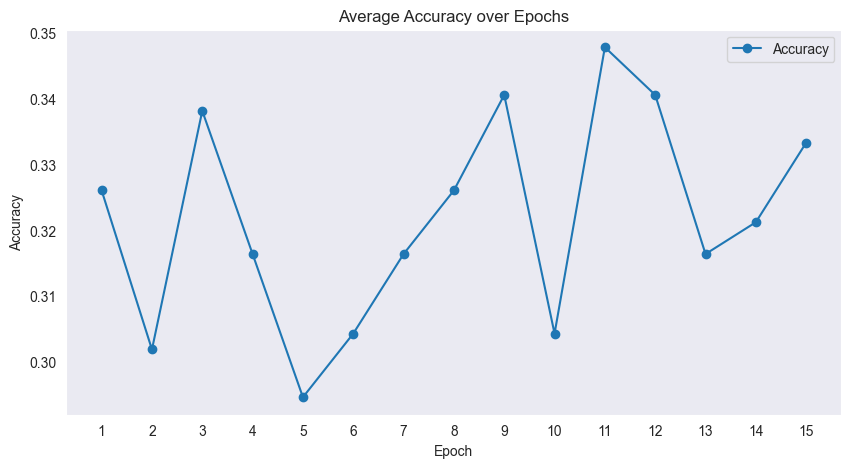

In [3]:
accsFirst = []
accsFirstpm1 = []
for epoch in accs:
    acc = []
    accpm1 = []
    for i in epoch:
        acc.append(i[0])
        accpm1.append(i[1])
    accsFirst.append(acc)
    accsFirstpm1.append(accpm1)
    

averagedAccs = np.mean(accsFirst, axis=0)
averagedAccspm1 = np.mean(accsFirstpm1, axis=0)

#plot this data
plt.figure(figsize=(10, 5))
plt.plot(averagedAccs, label="Accuracy", marker='o')
#plt.plot(averagedAccspm1, label="Accuracy + 1", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Average Accuracy over Epochs")
plt.xticks(np.arange(len(averagedAccs)), np.arange(1, len(averagedAccs) + 1))
plt.legend()
plt.grid()  


In [4]:
# load metadata
metadata = pd.read_csv("../data/ROSMAP/ROSMAP_clinical.csv")
columns = [
        "individualID", "braaksc", "ceradsc", "cogdx", "msex", "age_at_visit_max", "apoe_genotype", "pmi"
]
metadata = metadata[columns].dropna()
metadata["braaksc"] = metadata["braaksc"].replace({0: 0, 1: 0, 2: 0, 3: 1, 4: 2, 5: 3, 6: 3})
metadata["ceradsc"] = metadata["ceradsc"] - 1
metadata = metadata[metadata["cogdx"] != 6]
metadata["cogdx"] = metadata["cogdx"].astype(int) - 1
metadata["cogdx"] = metadata["cogdx"].replace({0: 0, 1: 1, 2: 1, 3: 2, 4: 2})

In [5]:
microglia = sc.read_h5ad("../data/ROSMAP/microglia.h5ad")

C:\Users\limmi\miniconda3\Lib\site-packages\anndata\compat\__init__.py:371: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [6]:
microglia = microglia[microglia.obs["individualID"].isin(metadata["individualID"])]
ids = microglia.obs["individualID"].unique()
print(len(ids))

432


In [9]:
# load model
#R5693901
#convert the first cell to a tensor

model = MultiTaskModel(
            input_dim=1000,
            num_classes_list=[4, 4, 3],
            task_types=["coral", "coral", "coral"]
        )
model.load_state_dict(torch.load("allTasks/Braak_model.pth"))
model = model.eval()
embeddings = {}

for id in ids:
    cells = microglia[microglia.obs["individualID"] == id][:, braakindex].X
    cellTensor = torch.tensor(cells, dtype=torch.float32)
    with torch.no_grad():
        shared_output = model.shared_layer(cellTensor)
        embedding = np.mean(np.array(shared_output), axis=0)
        embeddings[id] = embedding
    

# export this dict to a csv file called "embeddings.csv" in teh allTasks folder
embeddings_df = pd.DataFrame.from_dict(embeddings, orient='index')
embeddings_df.to_csv("allTasks/Braakembeddings.csv", index_label="individualID")




In [50]:
braakDicts = []
ceradDicts = []
cogdxDicts = []
sexDicts = []
ageDicts = []
ApoeDicts = []

def parseIDFile(filename):
    i = 0
    with open(filename, "r") as file:
        ids = file.read().splitlines()
        for line in ids:
            line = line[line.find("{"):]
            a = ast.literal_eval(line)
            if i == 1:
                braakDicts.append(a)
            elif i == 0:
                ceradDicts.append(a)
            elif i == 2:
                cogdxDicts.append(a)
            elif i == 3:
                sexDicts.append(a)
            elif i == 4:
                ageDicts.append(a)
            elif i == 5:
                ApoeDicts.append(a)
            i += 1
    
    
parseIDFile("CogdxIds/IDs0")
parseIDFile("CogdxIds/IDs1")
parseIDFile("CogdxIds/IDs2")
parseIDFile("CogdxIds/IDs3")
parseIDFile("CogdxIds/IDs4")

In [48]:
from collections import defaultdict
def merge_nested_dicts(dicts):
    merged = defaultdict(lambda: defaultdict(int))

    for d in dicts:
        for outer_key, inner_dict in d.items():
            for inner_key, value in inner_dict.items():
                merged[outer_key][inner_key] += value

    # Convert back to regular dicts
    return {k: dict(v) for k, v in merged.items()}

In [51]:
# average the dicts
braakAveraged = merge_nested_dicts(braakDicts)
ceradAveraged = merge_nested_dicts(ceradDicts)
cogdxAveraged = merge_nested_dicts(cogdxDicts)
sexAveraged = merge_nested_dicts(sexDicts)
ageAveraged = merge_nested_dicts(ageDicts)
apoeAveraged = merge_nested_dicts(ApoeDicts)

In [52]:
correctScoresDict = dict(zip(metadata["individualID"], metadata["cogdx"]))

In [53]:
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

ID: R4119160, Correct: 1, Predicted Medians: [1. 1. 1. 1. 1. 1.]
ID: R9116123, Correct: 1, Predicted Medians: [1. 1. 1. 1. 1. 1.]
ID: R3741788, Correct: 0, Predicted Medians: [1. 1. 1. 1. 1. 1.]
ID: R5636935, Correct: 1, Predicted Medians: [1. 1. 1. 1. 1. 1.]
ID: R9101940, Correct: 0, Predicted Medians: [1. 1. 1. 1. 1. 1.]
ID: R5079327, Correct: 1, Predicted Medians: [0. 0. 0. 1. 1. 1.]
ID: R8075334, Correct: 2, Predicted Medians: [1. 1. 1. 1. 1. 1.]
ID: R3442506, Correct: 0, Predicted Medians: [0. 0. 0. 0. 0. 0.]
ID: R6849345, Correct: 1, Predicted Medians: [2. 2. 2. 2. 2. 2.]
ID: R1830086, Correct: 2, Predicted Medians: [0. 0. 2. 0. 0. 0.]
ID: R3198654, Correct: 2, Predicted Medians: [2. 0. 2. 2. 0. 0.]
ID: R3722356, Correct: 2, Predicted Medians: [2. 0. 0. 0. 0. 0.]
ID: R3607578, Correct: 0, Predicted Medians: [0. 0. 0. 0. 0. 0.]
ID: R1020037, Correct: 1, Predicted Medians: [0. 0. 0. 0. 0. 0.]
ID: R2703808, Correct: 0, Predicted Medians: [0. 0. 2. 0. 0. 0.]
ID: R3185659, Correct: 0,

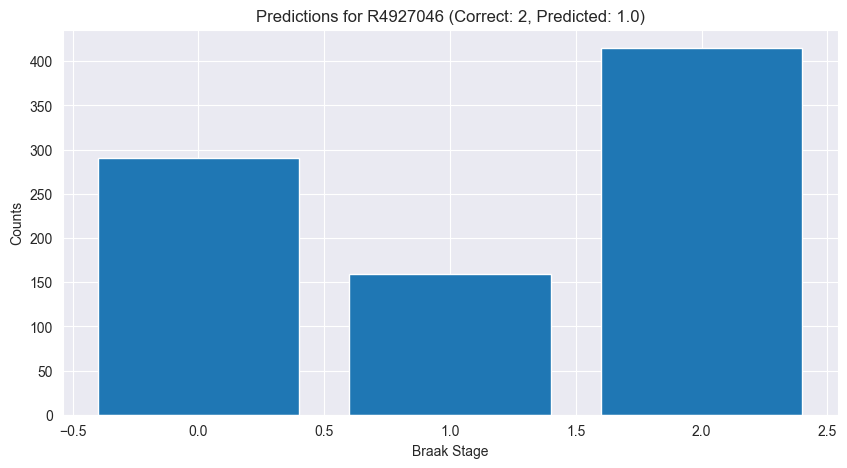

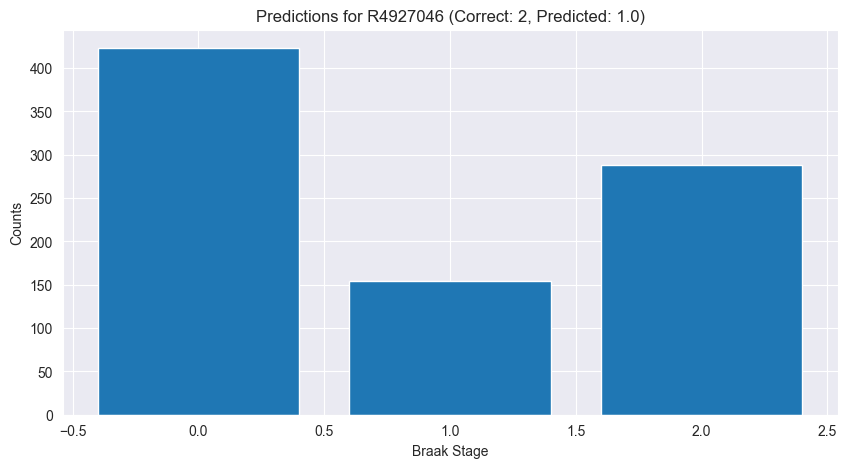

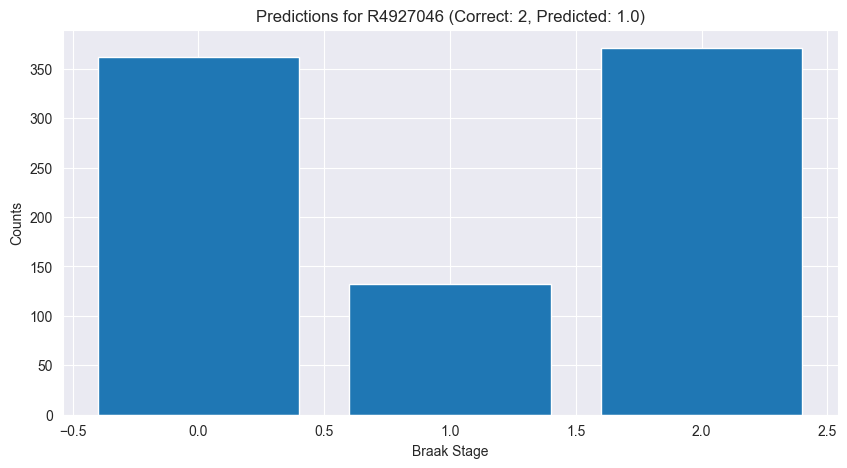

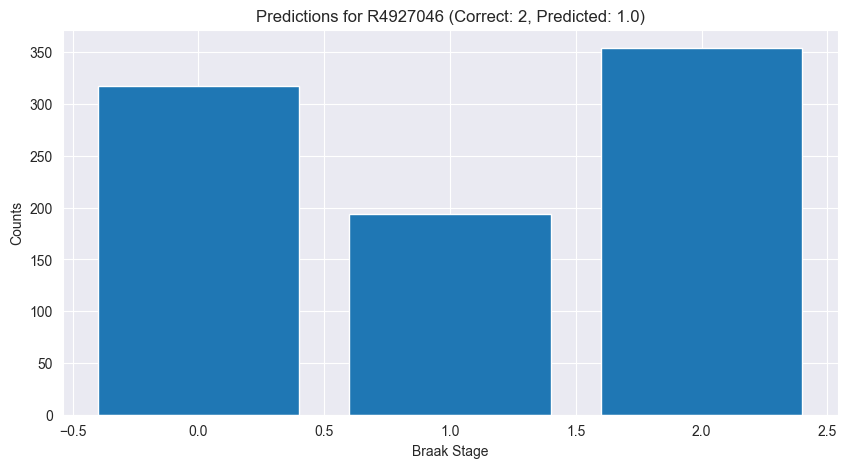

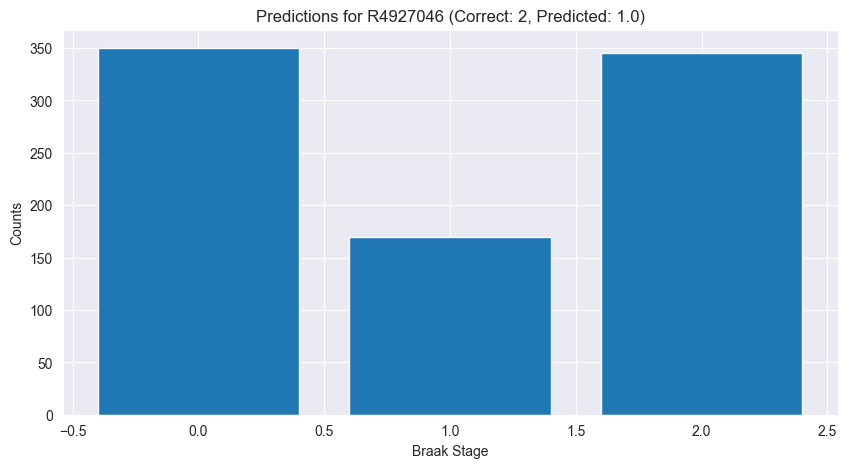

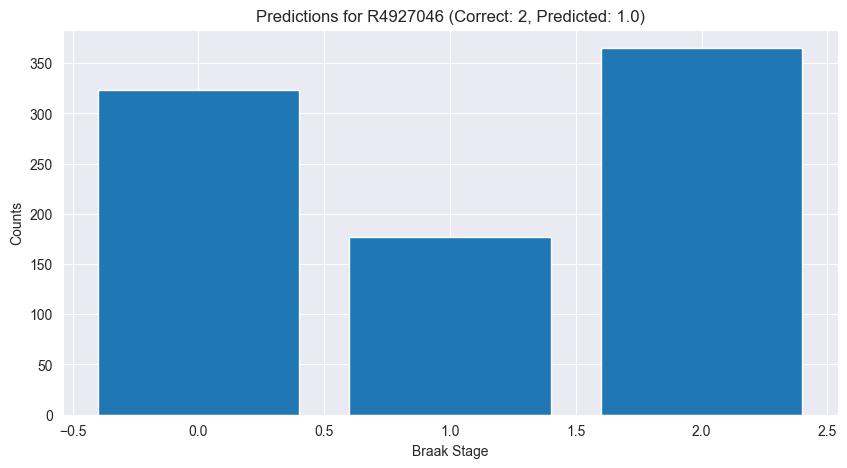

ID: R7029629, Correct: 0, Predicted Medians: [0. 0. 0. 0. 0. 0.]


In [71]:
dictIds = ceradAveraged
dictList = [ceradAveraged, braakAveraged, cogdxAveraged, sexAveraged, ageAveraged, apoeAveraged]
totalCount = 0

scoreMedian = np.zeros(len(dictList))
oneAwayMedian = np.zeros(len(dictList))

corrects = []
predicteds = []
for i in dictIds.keys():
    correct = correctScoresDict[i]
    totalCount += 1
    predsForCorrect = 0
    if correct in dictIds[i].keys():
        predsForCorrect = dictIds[i][int(correct)]
        
    corrects.append(correct)
    
        
    total = 0
    maxBraak = 0
    for j in range(4):
        if j in dictIds[i].keys():
            total += dictIds[i][j]
            
    maxes = np.zeros(len(dictList))
    counts = np.zeros(len(dictList))
    
    
    for d in dictList:
        index = dictList.index(d)
        for j in range(4):
            if j in d[i].keys():
                score = d[i][j]
                if score > counts[index]:
                    counts[index] = score
                    maxes[index] = j

    medians = np.zeros(len(dictList))
    counts = np.zeros(len(dictList))
    
    
    for d in dictList:
        index = dictList.index(d)
        for j in range(4):
            if j in d[i].keys():
                counts[index] += d[i][j]
                if counts[index] > (total / 2):
                    medians[index] = j
                    break
    
    for j in range(6):
        if correct == maxes[j]:
            scoreMedian[j] += 1
        if np.abs(correct - maxes[j]) <= 1:
            oneAwayMedian[j] += 1
            
    predicteds.append(maxes)
            
            
    
    print(f"ID: {i}, Correct: {correct}, Predicted Medians: {maxes}")

    # if correct == median:
    #     score += 1
    # if np.abs(correct - median) <= 1:
    #     oneAway += 1
    if i == "R4927046":
        for d in dictList:
            index = dictList.index(d)
            median = medians[index]
            correct = correctScoresDict[i]
            plt.figure(figsize=(10, 5))
            plt.bar(d[i].keys(), d[i].values())
            plt.xlabel("Braak Stage")
            plt.ylabel("Counts")
            plt.title(f"Predictions for {i} (Correct: {correct}, Predicted: {median})")
            plt.show()
        
# print("Median Scores:", scoreMedian)
# print("Median One away:", oneAwayMedian)
# 
# # calculate the percentages
# scoreMedian = scoreMedian / totalCount * 100
# oneAwayMedian = oneAwayMedian / totalCount * 100
# 
# print("Median Scores Percentage:", scoreMedian)
# print("Median One away Percentage:", oneAwayMedian)

# print(corrects)
# print(predicteds)
# 
# print(totalCount)


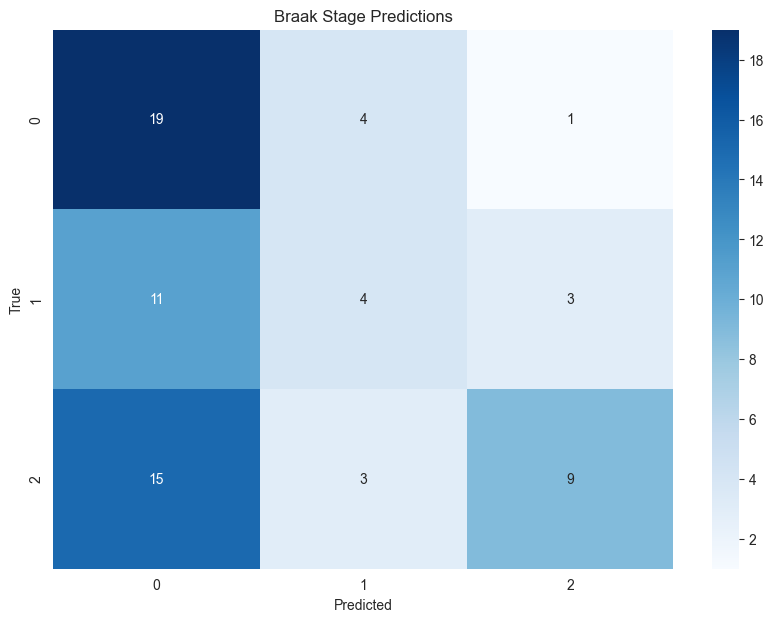

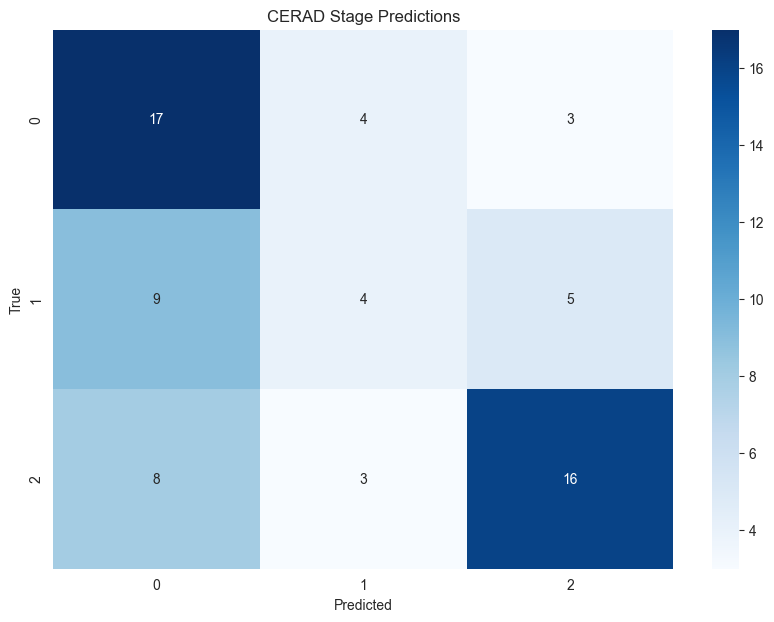

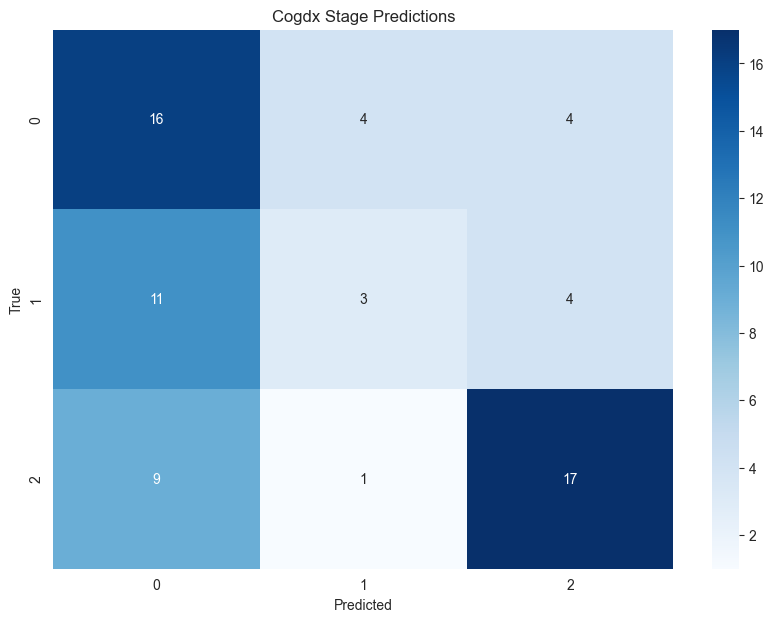

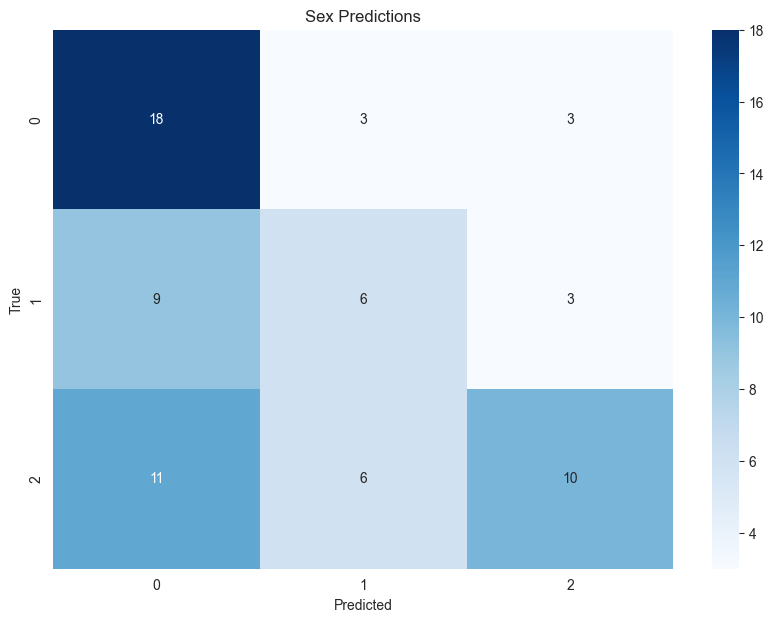

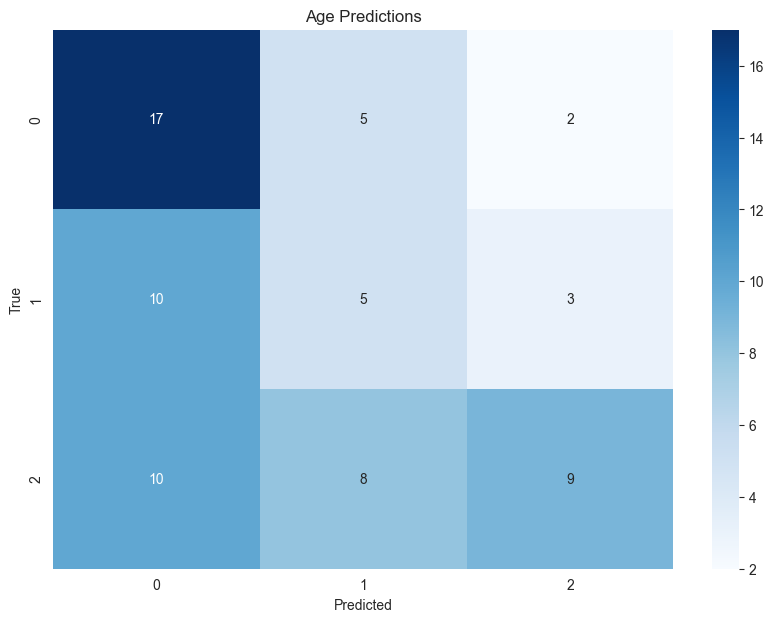

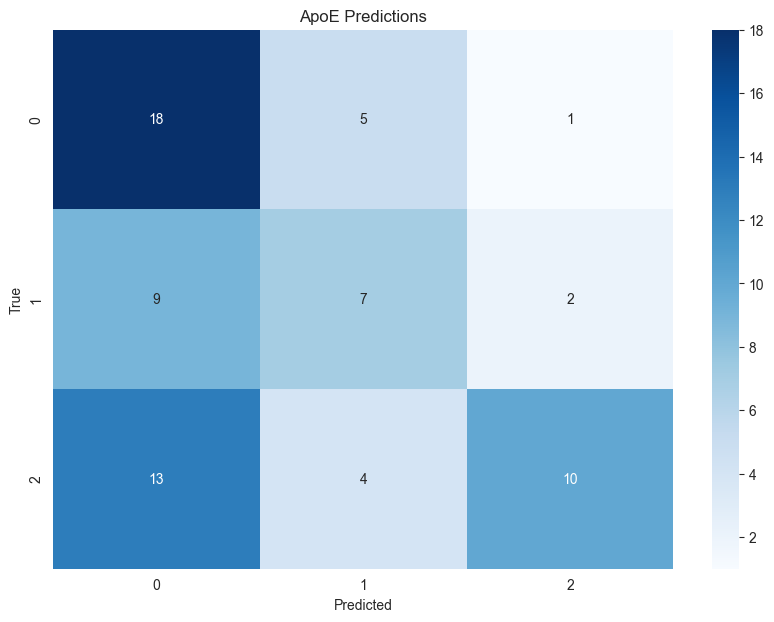

In [72]:
plot_confusion_matrix(corrects, [int(i[1]) for i in predicteds], classes=[0, 1, 2], title='Braak Stage Predictions')
plot_confusion_matrix(corrects, [int(i[0]) for i in predicteds], classes=[0, 1, 2], title='CERAD Stage Predictions')
plot_confusion_matrix(corrects, [int(i[2]) for i in predicteds], classes=[0, 1, 2], title='Cogdx Stage Predictions')
plot_confusion_matrix(corrects, [int(i[3]) for i in predicteds], classes=[0, 1, 2], title="Sex Predictions")
plot_confusion_matrix(corrects, [int(i[4]) for i in predicteds], classes=[0, 1, 2], title="Age Predictions")
plot_confusion_matrix(corrects, [int(i[5]) for i in predicteds], classes=[0, 1, 2], title="ApoE Predictions")



Text(0.5, 0, 'Models')

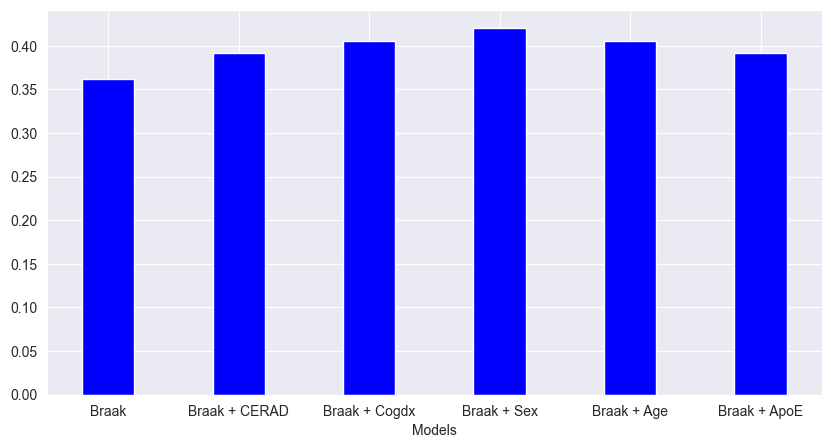

In [105]:
# plot the accuracies

labels = ["Braak", "Braak + CERAD", "Braak + Cogdx", "Braak + Sex", "Braak + Age", "Braak + ApoE"]
# exactly correct:
plt.figure(figsize=(10, 5))
plt.bar(labels, scoreMedian, width=0.4, label='Exactly Correct', color='blue')

plt.xlabel("Models")